In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
#reading in the data to compare the monte carlo error for different number of samples

path = 'data1.1dPart1.txt'

data_error_compare = []

with open(path, 'r') as f:
    header = f.readline() 
    
    for line in f:
        
        columns = line.split()
        data_line = []
        for value in columns:
            data_line.append(float(value))
            
        data_error_compare.append(data_line)

[-0.46275316  3.94323685]


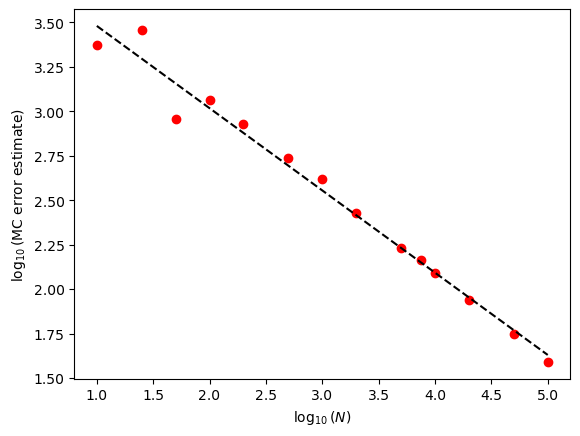

In [12]:
data_error_compare = np.array(data_error_compare)

x = np.log10(data_error_compare[:,0])
y = np.log10(data_error_compare[:,1])

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)


plt.plot(x,y, 'ro', x, poly1d_fn(x), '--k')

plt.ylabel(r'$\log_{10}$(MC error estimate)')
plt.xlabel(r'$\log_{10}(N)$')

print(coef)
plt.savefig('FlatBeam_MCerror_N_loglog.png',dpi=400)

In [4]:
#reading in the data for histo

path = 'data1.1dPart2.txt'

with open(path, 'r') as f:
    histo = f.read()


In [5]:
path = 'data1.1dPart2.txt'

data_histo = []
with open(path, 'r') as f:
    #histo = f.read()
    for _ in range(10):
        header = f.readline() 
    
    for line in f:
        
        columns = line.split()
        data_line = []
        
        for value in columns:
            try:
                data_line.append(float(value))
            except: break
        data_histo.append(data_line)
        
    data_histo.pop(-1)
        
            
        
                  

In [6]:
path = 'data1.1dPart3.txt'

data_fixed_s = []

with open(path, 'r') as f:
    header = f.readline() 
    
    for line in f:
        
        columns = line.split()
        data_line = []
        for value in columns:
            data_line.append(float(value))
            
        data_fixed_s.append(data_line)

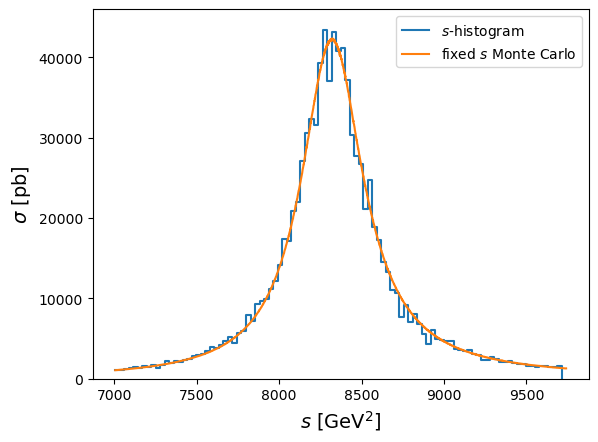

In [29]:
data_fixed_s = np.array(data_fixed_s)

zboson_mass = 91.2
zboson_decaywidth = 2.5
uniform_distribution = 1/((zboson_mass + 3*zboson_decaywidth)**2-(zboson_mass - 3*zboson_decaywidth)**2)
#plt.plot(x_bins,height)


lefts = [i[0] for i in data_histo]
lefts.append(data_histo[-1][0])
heights = [i[2] / (lefts[1] - lefts[0]) for i in data_histo]
heights.append(heights[-1])

plt.step(lefts, np.divide(heights,uniform_distribution), where='post',label=r'$s$-histogram')
plt.plot(data_fixed_s[:,0],data_fixed_s[:,1],label=r'fixed $s$ Monte Carlo')
plt.ylim(0,46000)
plt.xlabel(r'$s$ [GeV$^2$]',fontsize= 14)
plt.ylabel(r'$\sigma$ [pb]',fontsize= 14)
plt.legend()
plt.savefig('FlatBeam_sHisto.png',dpi=400)